<a href="https://colab.research.google.com/github/Krishlavasa/Krishna/blob/main/Petrol_Price_Prediction_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<center>Prediction using Supervised ML**

### ***Author - KRISH GOYAL***

In [5]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### 1 - Reading data from Remote Link

In [6]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Petrol_Prices.csv")
data.head(10)

,Date,Prices,Day
0,1.07.22,110.86,1
1,2.07.22,110.86,2
2,3.07.22,110.86,3
3,4.07.22,110.86,4
4,5.07.22,110.86,5
5,6.07.22,110.86,6
6,7.07.22,110.86,7
7,8.07.22,110.86,8
8,9.07.22,110.86,9
9,10.07.22,110.86,10


In [8]:
data = data.drop('Date', axis = 1)
data

,Prices,Day
0,110.86,1
1,110.86,2
2,110.86,3
3,110.86,4
4,110.86,5
5,110.86,6
6,110.86,7
7,110.86,8
8,110.86,9
9,110.86,10


In [9]:
# Check if there any null value in the Dataset
data.isnull == True

False

### **2 - Data Visualization**

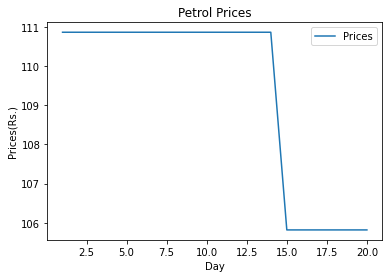

In [10]:
# Plotting the distribution of scores
data.plot(x='Day', y='Prices')  
plt.title('Petrol Prices')  
plt.xlabel('Day')  
plt.ylabel('Prices(Rs.)')  
plt.show()

### **3 - Data Preprocessing**

In [11]:
# Defining X and y from the Data
X = data.iloc[:, 1:].values  
y = data.iloc[:, :1].values

In [12]:
data.iloc[:, :1].values

array([[110.86],
       [110.86],
       [110.86],
       [110.86],
       [110.86],
       [110.86],
       [110.86],
       [110.86],
       [110.86],
       [110.86],
       [110.86],
       [110.86],
       [110.86],
       [110.86],
       [105.82],
       [105.82],
       [105.82],
       [105.82],
       [105.82],
       [105.82]])

### **4 - Training the Model**

**Splitting the Data and Fitting the Data into the model**

In [13]:
# Spliting the Data in two
train_X, val_X, train_y, val_y = train_test_split(X, y,  test_size=0.3,random_state = 0)
regressor = LinearRegression()
regressor.fit(train_X, train_y)

print("***********Traing Complete************")

***********Traing Complete************


### **5 - Plotting the Line of Regression** 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


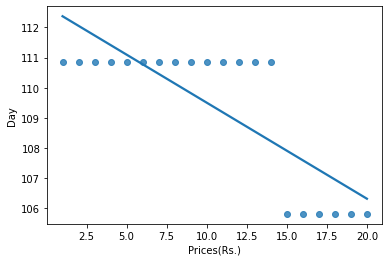

In [14]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data

# sns.regplot(X, y)
sns.regplot(X, y, ci=None)
plt.xlabel('Prices(Rs.)')  
plt.ylabel('Day')  
plt.show()

### **6 - Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [15]:
val_X , val_y

(array([[19],
        [ 2],
        [20],
        [ 9],
        [11],
        [18]]), array([[105.82],
        [110.86],
        [105.82],
        [110.86],
        [110.86],
        [105.82]]))

In [16]:
# print(val_X) # Testing data - In Hours
y_pred = regressor.predict(val_X) # Predicting the scores
y_pred

array([[107.03795753],
       [111.87207685],
       [106.75359757],
       [109.88155713],
       [109.31283721],
       [107.32231749]])

In [17]:
y_test = np.array([21,22,23,24,25])
y_test = y_test.reshape(-1,1)
y_pred_5 = regressor.predict(y_test) # Predicting the scores
y_pred_5 = y_pred_5.flatten()
y_pred_5

array([106.46923761, 106.18487765, 105.90051769, 105.61615774,
       105.33179778])

### **7 - Comparing the Predicted Marks with the Actual Marks**

In [18]:
actualprice = np.array([[105.82],[105.82],[105.82],[105.82],[105.82]])
actualprice = actualprice.flatten()
data = {'Actual Price': actualprice,'Predicted Price': y_pred_5}
# data1 = {}
df1 = pd.DataFrame(data)
df1

,Actual Price,Predicted Price
0,105.82,106.469238
1,105.82,106.184878
2,105.82,105.900518
3,105.82,105.616158
4,105.82,105.331798


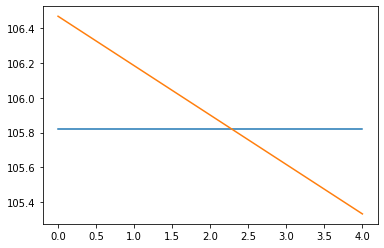

In [19]:
plt.plot(df1)

In [20]:
# Estimating training and test score 
print("Training Score:",regressor.score(train_X,train_y))
print("Test Score:",regressor.score(val_X,val_y))

Training Score: 0.4770107546649526
Test Score: 0.764126524223488


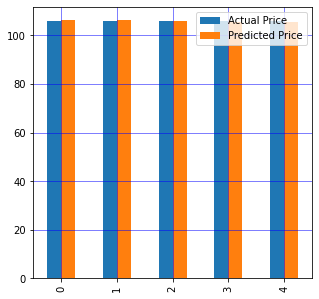

In [21]:
# Visually Comparing the Predicted Marks with the Actual Marks
df1.plot(kind= 'bar',figsize= (5,5))
plt.grid(which='major',linewidth ='0.5',color = 'blue')
plt.grid(which='minor',linewidth ='0.5',color = 'red')
plt.show()

### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen three main metrics:

##### The mean square error
##### The mean squared error
##### The root mean squared error

In [22]:
# Calculating the accuracy of the model
print('Mean Absolute Error:', metrics.mean_absolute_error(val_y, y_pred)) 
print('Mean Squared Error:' ,metrics.mean_squared_error(val_y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(val_y, y_pred)))
print("R-2:" ,metrics.r2_score(val_y,y_pred))

Mean Absolute Error: 1.1985925176946353
Mean Squared Error: 1.497890920571165
Root Mean Squared Error: 1.223883540444582
R-2: 0.764126524223488


R-2 gives the score of Model fit in this case we have R-2 = 0.764126524223488 which is actually a great score for the Model.

## **Conclusion**

**I have successfully carried out Prediction using Supervised ML task and was able to evaluate the model's performance on the various parameters.**

# **Thank You**